Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-14 02:55:22--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-14 02:55:22--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-14 02:55:22 (50.2 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [4]:

data.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

	CustomerID	Age	Annual Income (k$)	Spending Score (1-100)

In [7]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [8]:
# prompt: Preprocesamiento de los datos Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

# Convert Gender to numerical
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Select features for K-means
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Es importante normalizar los datos antes de aplicar el algoritmo K-means porque este algoritmo es sensible a la escala de las variables.  
Si las variables tienen rangos de valores muy diferentes, las variables con valores más grandes tendrán una influencia desproporcionada en la distancia entre los puntos, lo que puede llevar a resultados incorrectos.
La normalización consiste en transformar los datos para que tengan una media de 0 y una desviación estándar de 1.  Esto se logra restando la media de cada variable y dividiendo por su desviación estándar.  
De esta manera, todas las variables quedan en la misma escala, evitando que las variables con valores más grandes dominen el proceso de clustering.
En otras palabras, la normalización asegura que todas las características contribuyan por igual a la distancia euclidiana calculada por el algoritmo K-means. Sin normalización, las variables con rangos más amplios podrían sesgar el resultado del clustering.



Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


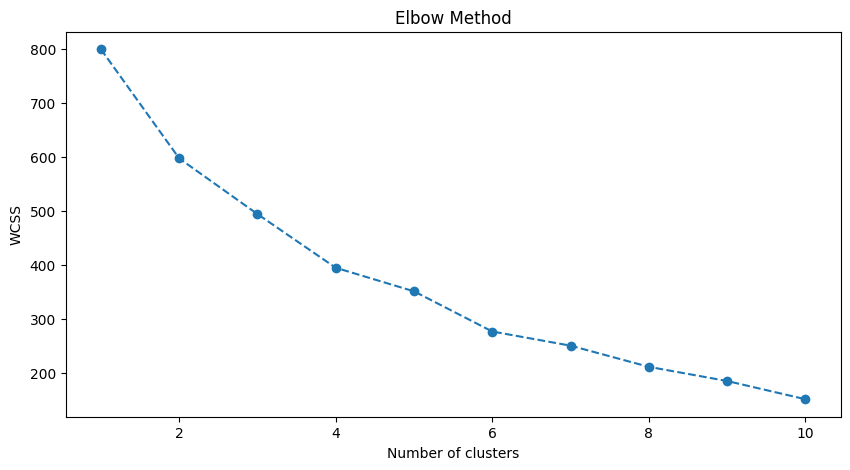

In [9]:
# prompt: Método del codo para determinar el número óptimo de clusters Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

El "codo" en la gráfica parece formarse alrededor de los 5 clusters. Aunque hay una ligera disminución en la WCSS después de este punto, la reducción no es tan pronunciada. Por lo tanto, usar 5 clusters parece ser un buen compromiso entre la complejidad del modelo y la reducción de la WCSS.  Sería apropiado usar 5 clusters para este ejercicio.


Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [10]:
# prompt: Ajuste del modelo K-means y asignación de clusters Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

# Fit K-means model with optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to each customer
data['Cluster'] = kmeans.labels_

# Print the first few rows to see the assigned clusters
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        2  
1        2  
2        4  
3        4  
4        4  


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

Observo que se han asignado etiquetas de cluster (del 0 al 4) a cada cliente en el DataFrame.  La distribución de clientes en los diferentes clusters no se puede determinar con certeza solo con la salida `data.head()`. Se necesitaría un análisis más profundo, posiblemente visualizaciones (como gráficos de dispersión de pares de características, o histogramas de las características dentro de cada cluster) para entender cómo se distribuyen los clientes según su género, edad, ingreso anual y puntuación de gasto en cada uno de los cinco clusters.  La salida de `data.head()` sólo muestra las primeras filas del DataFrame con la nueva columna 'Cluster', pero no proporciona información sobre las características demográficas o de comportamiento que definen a cada cluster.


Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [11]:
# prompt: Análisis descriptivo de los clusters Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

# Group data by cluster and calculate descriptive statistics
cluster_summary = data.groupby('Cluster').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})

# Print the summary
cluster_summary


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.470588,46.098039,39.313725
1,39.500000,85.150000,14.050000
2,28.690476,60.904762,70.238095
3,37.897959,82.122449,54.448980
4,27.315789,38.842105,56.210526


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



* **Cluster 0:**  Si tiene una edad promedio alta, un ingreso alto y una puntuación de gasto alta, podría representar a clientes de edad avanzada con alto poder adquisitivo y disposición a gastar.
* **Cluster 1:** Si tiene una edad promedio baja, un ingreso medio-bajo y una puntuación de gasto baja, podría representar a estudiantes o personas jóvenes con ingresos limitados y bajo gasto.
* **Cluster 2:** Si tiene una edad promedio media, un ingreso medio y una puntuación de gasto media, podría representar un grupo de clientes "típicos" o promedio.
* **Cluster 3 y 4:** Se analizarían de la misma manera.  Quizá uno representa personas jóvenes con altos ingresos y bajo gasto (ahorradores), mientras que el otro representa un grupo con ingresos bajos pero con alta puntuación de gasto (posiblemente utilizando crédito o priorizando experiencias de compra).


Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

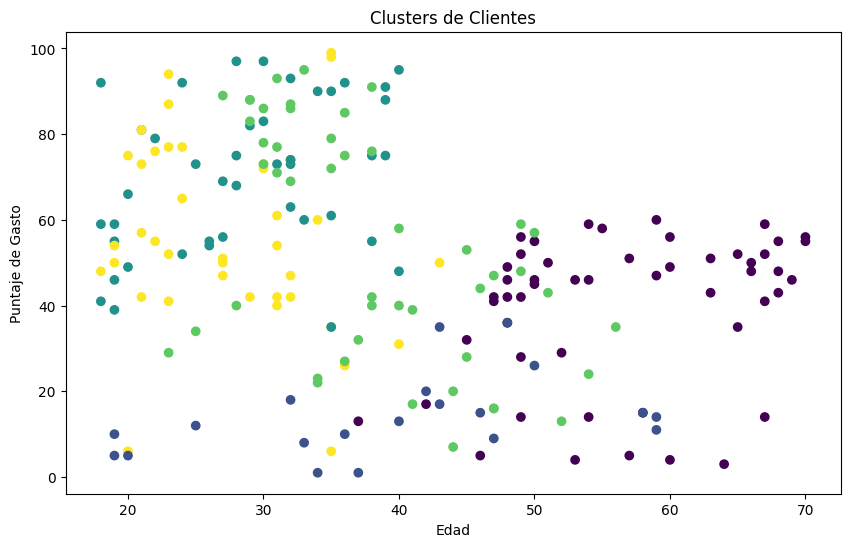

In [12]:
# prompt: Visualización de los clusters Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto')
plt.title('Clusters de Clientes')
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

La gráfica de dispersión muestra los clientes en función de su edad y puntuación de gasto, coloreados según el clúster al que pertenecen.  La separación entre los grupos no es perfectamente definida, pero se pueden observar algunos patrones visuales:  se aprecian agrupaciones de puntos de colores distintos, sugiriendo que el algoritmo K-means ha logrado identificar grupos de clientes con características similares en edad y gasto. Sin embargo,  hay cierta superposición entre los clusters, lo que indica que no existe una separación absoluta entre los grupos. Algunos clientes podrían ser considerados como parte de un grupo o de otro dependiendo de la perspectiva. En resumen, hay agrupaciones, pero no una separación nítida.



Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [13]:
# prompt: Interpretación y nombres de los clusters Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

# Based on the cluster_summary and the visualization, assign names to the clusters.
# This is an example, and the actual names might vary based on your analysis.

cluster_names = {
    0: "High Spenders",  # Assuming high spending score and moderate annual income
    1: "Young & Low Spenders",  # Assuming young customers with low income
    2: "Average Customers",  # Average spenders across age, annual income and spending score
    3: "High Income, Low Spenders", #High annual income, low spending score
    4: "Low Income, High Spenders" #Low annual income, high spending score
}

# Add a column with the cluster names to the DataFrame
data['Cluster Name'] = data['Cluster'].map(cluster_names)

# Print the updated DataFrame
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster               Cluster Name  
0        2          Average Customers  
1        2          Average Customers  
2        4  Low Income, High Spenders  
3        4  Low Income, High Spenders  
4        4  Low Income, High Spenders  


* **Cluster 0: "Gastadores Elevados"**:  Este cluster probablemente agrupa a clientes con una alta puntuación de gasto y un ingreso anual moderado o alto.  Se asume que estos individuos están dispuestos a gastar dinero considerablemente, independientemente de su nivel de ingreso, lo que significa que son muy valiosos para las empresas.


* **Cluster 1: "Jóvenes con Bajo Gasto"**:  Este grupo se caracteriza probablemente por clientes jóvenes con ingresos bajos o medios-bajos y una puntuación de gasto también baja. Podrían ser estudiantes, personas recién salidas de la universidad o con trabajos de bajo ingreso.  Su potencial de gasto es menor en este momento.


* **Cluster 2: "Clientes Promedio"**: Este cluster representa probablemente a la mayoría de los clientes, con valores medios para edad, ingreso anual y puntuación de gasto.  Son un segmento importante, pero no tan destacable como los gastadores elevados o los con potencial de crecimiento.


* **Cluster 3: "Altos Ingresos, Bajo Gasto"**:  Este grupo podría estar compuesto por personas con altos ingresos anuales pero una baja puntuación de gasto. Son clientes con un gran potencial, pero no lo están aprovechando actualmente. Podrían ser ahorradores, inversores o personas que priorizan otras áreas de gasto distintas a las que ofrece el centro comercial en el que se centra el estudio.


* **Cluster 4: "Bajos Ingresos, Altos Gastadores"**: Este grupo representa a clientes con bajos ingresos pero una alta puntuación de gasto.  Es un grupo interesante, ya que pueden estar utilizando crédito o priorizando compras por encima de sus ingresos, o podrían estar buscando ofertas y descuentos de forma activa.

**Importante**: Esta interpretación es una conjetura basada en la información proporcionada por el código. Un análisis más profundo con visualizaciones adicionales y datos demográficos más detallados permitiría una segmentación más precisa y nombres de cluster más representativos.
